# Recurrent Neural Networks as Language Models

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# In these functions, z and x are vectors.
# We are doing an element wise operation on the vector.
softmax = lambda z: np.exp(z - np.max(z)) / np.sum(np.exp(z - np.max(z)))
sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))

def rnn(s, wemb, U, W, V):
    s_n = sigmoid( U * wemb + W * s )
    y = softmax( V * s_n )
    return s_n, y

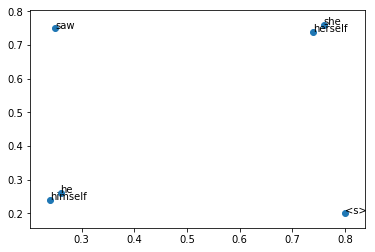

In [13]:
wemb = { 
    '<s>': np.mat('0.8; 0.2'),
    'he': np.mat('0.26; 0.26'),
    'himself': np.mat('0.24; 0.24'),
    'she': np.mat('0.76; 0.76'),
    'herself': np.mat('0.74; 0.74'),
    'saw': np.mat('0.25; 0.75'),
    }

np.mat('0.26; 0.26').item(0,0)
x = []
y = []
for w in list(wemb.keys()):
    x.append(wemb[w].item(0,0))
    y.append(wemb[w].item(1,0))
#print x, y
fig, ax = plt.subplots()
ax.scatter(x, y)
for w in list(wemb.keys()):
    ax.annotate(w, (wemb[w].item(0,0), wemb[w].item(1,0)))

In [14]:
U = np.mat('1.0, 1.0; 1.0, 1.0')
W = np.mat('1.0, 1.0; 1.0, 1.0')
V = np.mat('0.75, 0.25; 0.26, 0.26; 0.24, 0.24; 0.76, 0.76; 0.74, 0.74; 0.25, 0.75')
V_words = list(wemb.keys())
s_0 = np.mat('0; 0')

In [15]:
import operator
sent = '<s> she saw herself'.split()
s = s_0
for w in sent:
    s_n, y = rnn(s, wemb[w], U, W, V)
    print(("y:\n", y))
    y_vals = [i for i in enumerate([x.item(0,0) for x in y])]
    print(y_vals)
    max_index, max_value = max(y_vals, key=operator.itemgetter(1))
    print(("w, max(y):", max_index, max_value))
    print(("state:\n", s_n))
    s = s_n

('y:\n', matrix([[0.15947263],
        [0.11227646],
        [0.10904077],
        [0.23322946],
        [0.22650804],
        [0.15947263]]))
[(0, 0.15947263293457503), (1, 0.1122764585110807), (2, 0.10904077188380022), (3, 0.23322946284887747), (4, 0.22650804088709156), (5, 0.15947263293457503)]
('w, max(y):', 3, 0.23322946284887747)
('state:\n', matrix([[0.73105858],
        [0.73105858]]))
('y:\n', matrix([[0.15474262],
        [0.09799521],
        [0.09433461],
        [0.25383342],
        [0.24435152],
        [0.15474262]]))
[(0, 0.15474261797965527), (1, 0.09799520668129748), (2, 0.09433461347299933), (3, 0.2538334227240058), (4, 0.24435152116238681), (5, 0.15474261797965527)]
('w, max(y):', 3, 0.2538334227240058)
('state:\n', matrix([[0.95175967],
        [0.95175967]]))
('y:\n', matrix([[0.15483113],
        [0.09822742],
        [0.09457229],
        [0.25348521],
        [0.24405282],
        [0.15483113]]))
[(0, 0.1548311273802911), (1, 0.09822741550548778), (2, 0.094572

In [16]:
sent = '<s> she saw herself'.split()
print(list(enumerate(sent)))

s_last, y_last = rnn(rnn(rnn(rnn(s_0, wemb[sent[0]], U, W, V)[0], 
                             wemb[sent[1]], U, W, V)[0], 
                         wemb[sent[2]], U, W, V)[0], 
                     wemb[sent[3]], U, W, V)
print(s_last)
print(y_last)


[(0, '<s>'), (1, 'she'), (2, 'saw'), (3, 'herself')]
[[0.96694729]
 [0.96694729]]
[[0.15438035]
 [0.09705567]
 [0.09337343]
 [0.25524707]
 [0.24556313]
 [0.15438035]]


In [17]:
print(('='*20))
U = np.mat('1.0, 1.0; 1.0, 1.0')
print((sigmoid(U * np.mat('0.26; 0.26'))))

[[0.62714777]
 [0.62714777]]
